### I. Supervised Learning
    I.1) Linear Regression 

In [3]:
import numpy as np # Mathematical Operations
import matplotlib.pyplot as plt # Visualization
import pandas as pd # Data Manipulations
from sklearn.datasets import make_regression # A simple function that creates a simple regression_data

x, y = make_regression(n_samples=1000, n_features=1, noise=15) # Simple LR <=> x holds only 1 variable
df = pd.DataFrame(x, columns=['features']) # Stores a simple dataframe of only the x variable
df['target'] = y # Adds the target column
df.head()

,features,target
0,2.020164,88.975118
1,-0.581344,-26.046525
2,0.379290,22.077337
3,0.384537,-4.637863
4,-0.636036,-41.251949


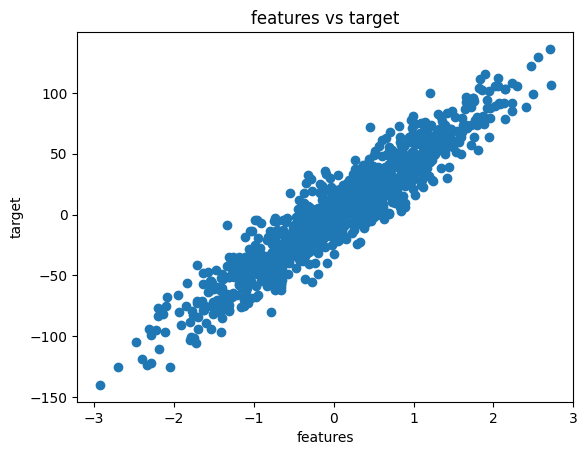

In [19]:
# Visualization of our dataframe
# Whnen working with a high dimensional features, we can't visualize the predictions, we can only evaluate them with MSE and R²
plt.scatter(x, y)
plt.title('features vs target')
plt.xlabel('features')
plt.ylabel('target')
plt.show()

    I.1.1) Least Squares (Moindre Carrés)

In [9]:
def Moindres_Carrées(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    def Cov(x, y):
        m = len(y)
        return (1 / m) * np.sum((x - x_mean) * (y - y_mean))
    
    def Var(x):
        m = len(x)
        return (1 / m) * np.sum((x - x_mean) ** 2)

    # These results are far demonstrated in the course
    theta1 = Cov(x, y) / Var(x)
    theta0 = y_mean - theta1 * x_mean 

    return theta0, theta1

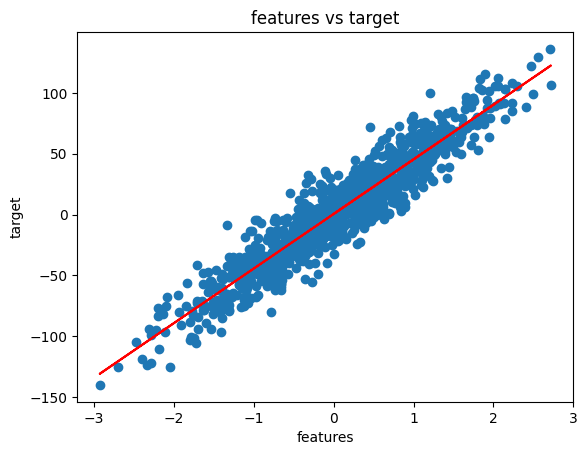

Coeff R² for MC : 0.8875658157470007, MSE : 234.87664318256535, MAE : 12.27689472050323


In [10]:
x_flattened = x.flatten() # When using this method, make sure the variables are 1D 
theta = Moindres_Carrées(x_flattened, y)
y_MC = theta[0] + theta[1] * x_flattened
plt.scatter(x_flattened, y)
plt.plot(x_flattened, y_MC, c='red', label='Moindres Carrées')
plt.title('features vs target')
plt.xlabel('features')
plt.ylabel('target')
plt.show()
# Evaluation
def CoeffEval(y, y_predicted): # R²
    val1 = np.sum((y - y_predicted) ** 2)
    val2 = np.sum((y - np.mean(y)) ** 2)
    return 1 - val1 / val2
    
def Errors(y, y_predicted):
    m = len(y)
    MSE = (1 / m) * np.sum((y - y_predicted) ** 2)
    MAE = (1 / m) * np.sum(abs(y - y_predicted))
    return MSE, MAE
    
MSE, MAE = Errors(y, y_MC)
print(f"Coeff R² for MC : {CoeffEval(y, y_MC)}, MSE : {MSE}, MAE : {MAE}")

    I.1.2) Normal Equation (Equation Normale)

In [11]:
def EquationNormale(x, y):
    x_transformed = np.c_[np.ones(x.shape), x]
    return np.linalg.inv(x_transformed.T @ x_transformed) @ x_transformed.T @ y

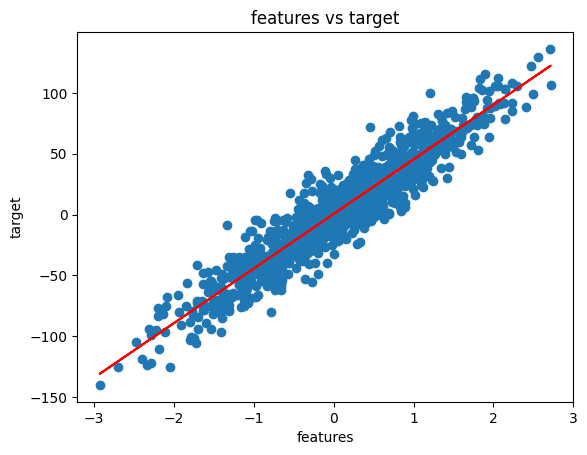

Coeff R² for EN : 0.8875658157470008, MSE : 234.87664318256532, MAE : 12.27689472050323


In [12]:
theta = EquationNormale(x, y)
x_b = np.c_[np.ones(x.shape), x]
y_EN = np.dot(x_b, theta)
plt.scatter(x, y)
plt.plot(x, y_EN, c='red', label='Equation Normale')
plt.title('features vs target')
plt.xlabel('features')
plt.ylabel('target')
plt.show()
MSE, MAE = Errors(y, y_EN)
print(f"Coeff R² for EN : {CoeffEval(y, y_EN)}, MSE : {MSE}, MAE : {MAE}")

    I.1.3) Gradient Descent (Most Imporant!!!)

In [13]:
def GradientDescente(x, y, learning_rate, iterations):
    m = len(y)
    theta0 = 0
    theta1 = 0
    for i in range(iterations):
        y_pred = theta0 + theta1 * x
        
        d_theta0 = (-1 / m) * np.sum(y - y_pred)
        d_theta1 = (-1 / m) * np.sum(x * (y - y_pred))

        theta0 -= learning_rate * d_theta0
        theta1 -= learning_rate * d_theta1

    return theta0, theta1

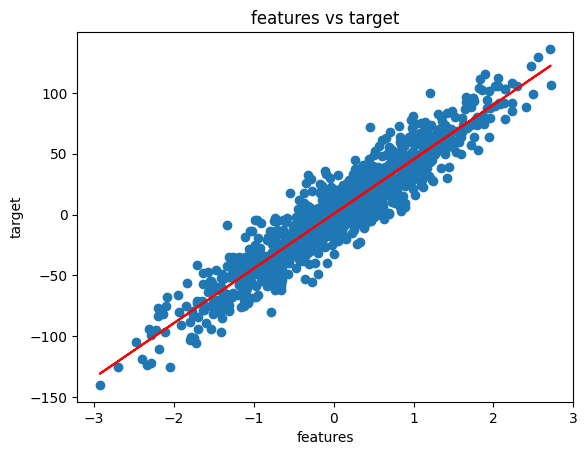

Coeff R² for GD : 0.8875658062478762, MSE : 234.87666302637427, MAE : 12.276854120458385


In [16]:
x_flattened = x.flatten()
iterations = 1000
learning_rate = 0.01
theta0, theta1 = GradientDescente(x_flattened, y, learning_rate, iterations)
y_GD = theta0 + theta1 * x_flattened
plt.scatter(x_flattened, y)
plt.plot(x, y_GD, c='red', label='Equation Normale')
plt.title('features vs target')
plt.xlabel('features')
plt.ylabel('target')
plt.show()
MSE, MAE = Errors(y, y_GD)
print(f"Coeff R² for GD : {CoeffEval(y, y_GD)}, MSE : {MSE}, MAE : {MAE}")

    I.5) Predefined Scikit-Learn Function

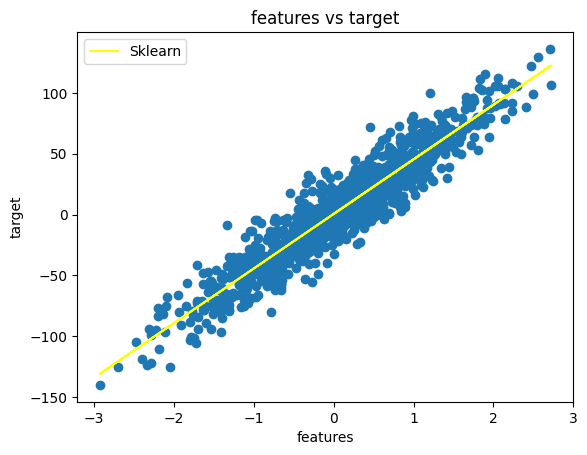

Coeff R² for SKlearn : 0.8875658157470008, MSE : 234.8766431825653, MAE : 12.27689472050323


In [18]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

# Make sure x shape is 2D
if len(x.shape) < 2:
    x = x.reshape(-1, 1)
LR.fit(x, y) # Fit/Train on the data [x, y]
y_pred = LR.predict(x) # Predicts the output y of the input features x

plt.scatter(x, y)
plt.plot(x, y_pred, c='yellow', label="Sklearn")
plt.title('features vs target')
plt.xlabel('features')
plt.ylabel('target')
plt.legend()
plt.show()

MSE, MAE = Errors(y, y_pred)
print(f"Coeff R² for SKlearn : {CoeffEval(y, y_pred)}, MSE : {MSE}, MAE : {MAE}")

### Other Methods
    1. Decision Trees, Random Forest and Gradient Boosting

In [22]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split # Important
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
x, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=0)

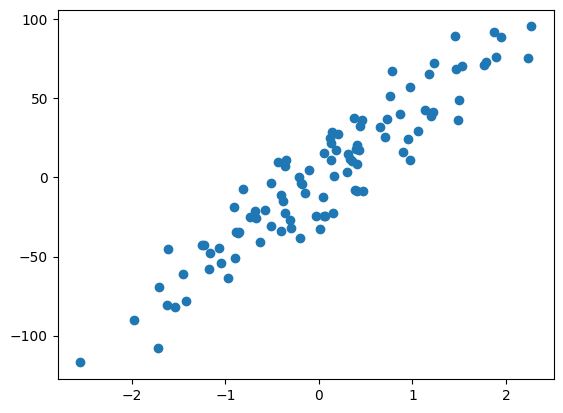

In [23]:
# Visualization
plt.scatter(x, y)
plt.show()

Mean Squared Error: 565.4880504689859
R-squared: 0.7417581574800735


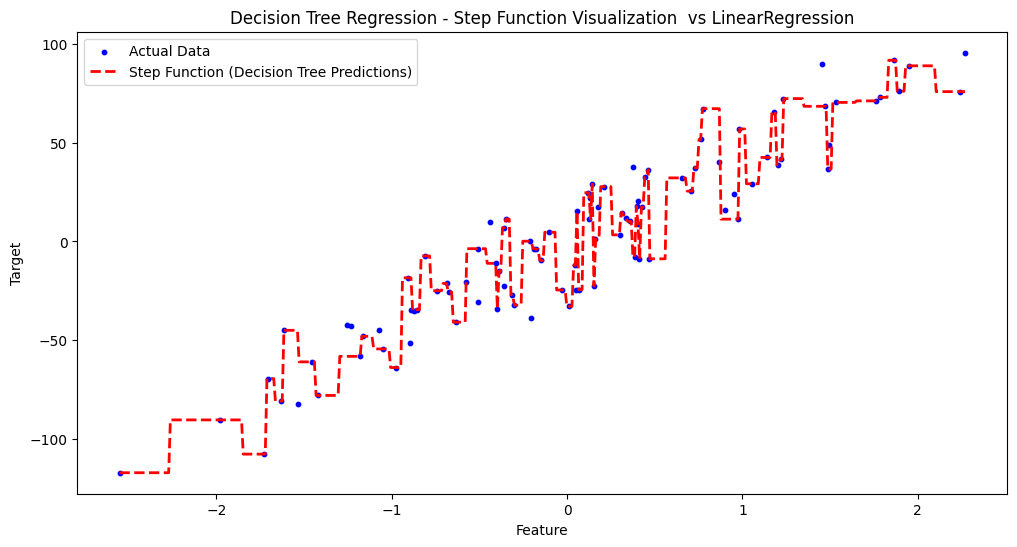

In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% Train, 20% Test

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

# Evaluate using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

X_range = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_pred_range = dtr.predict(X_range)

# Plotting the step function along with the actual data points
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color="blue", s=10, label="Actual Data")
plt.plot(X_range, y_pred_range, color="red", lw=2, linestyle='--', label="Step Function (Decision Tree Predictions)")
plt.title("Decision Tree Regression - Step Function Visualization  vs LinearRegression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

Mean Squared Error: 436.4757602975052
R-squared: 0.8006742946008627


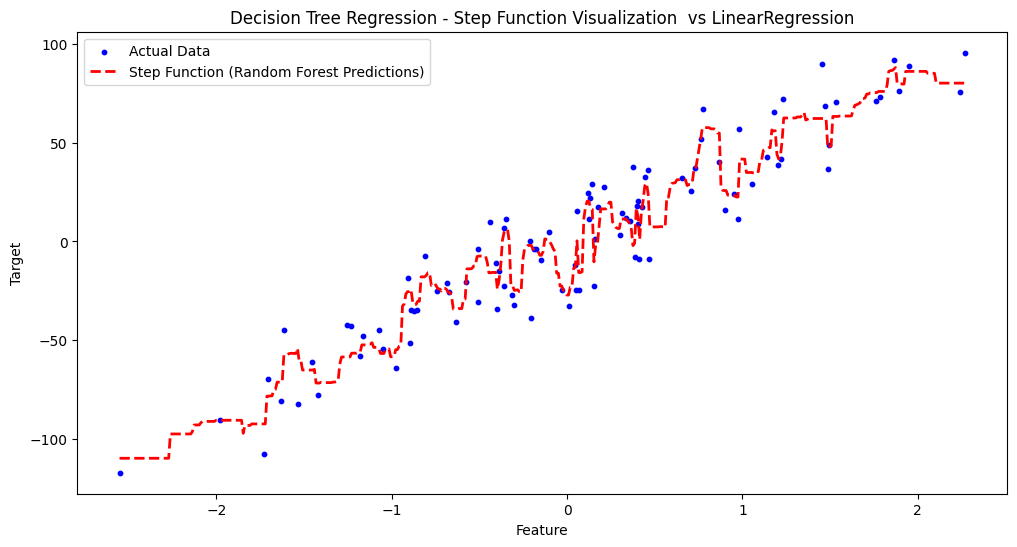

In [28]:
# Random Forest (Many Decision Trees)
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% Train, 20% Test

dtr = RandomForestRegressor(random_state=42)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

# Evaluate using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

X_range = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_pred_range = dtr.predict(X_range)

# Plotting the step function along with the actual data points
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color="blue", s=10, label="Actual Data")
plt.plot(X_range, y_pred_range, color="red", lw=2, linestyle='--', label="Step Function (Random Forest Predictions)")
plt.title("Decision Tree Regression - Step Function Visualization  vs LinearRegression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

Mean Squared Error: 375.4613111539237
R-squared: 0.8285378078158798


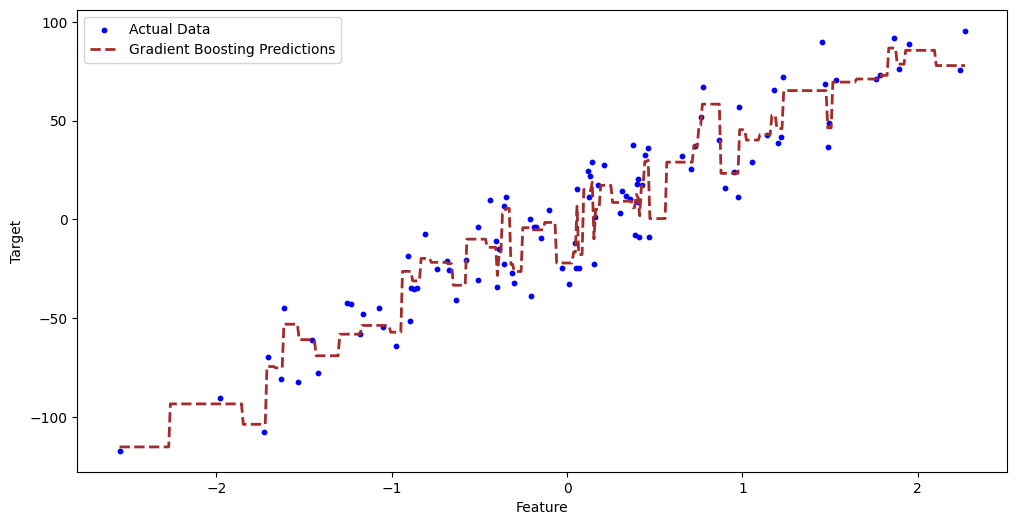

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_gbr)
print("R-squared:", r2_gbr)

X_range = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_pred_range = gbr.predict(X_range)

# Plot the actual data points and the model predictions
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color="blue", s=10, label="Actual Data")
plt.plot(X_range, y_pred_range, color="brown", linestyle="--", lw=2, label="Gradient Boosting Predictions")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

    2. SVR (Support Vector Regressor)

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model_poly = SVR(kernel='rbf', C=1.0, epsilon=0.1, degree=2, coef0=1) # Rbf Regression
svr_model_linear = SVR(kernel='linear', C=1.0, epsilon=0.1) # Linear Regression
svr_model_rbf = SVR(kernel='poly', C=1.0, epsilon=0.1, gamma='scale') # Polynomial Regression

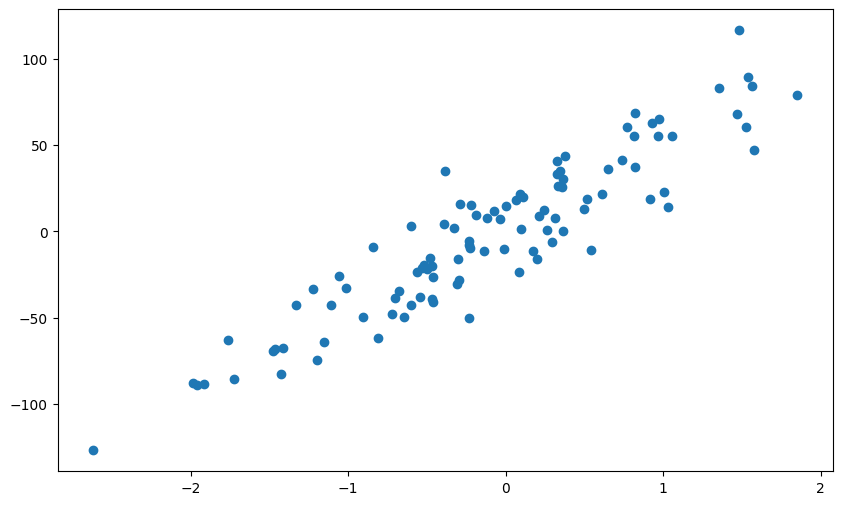

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.show()

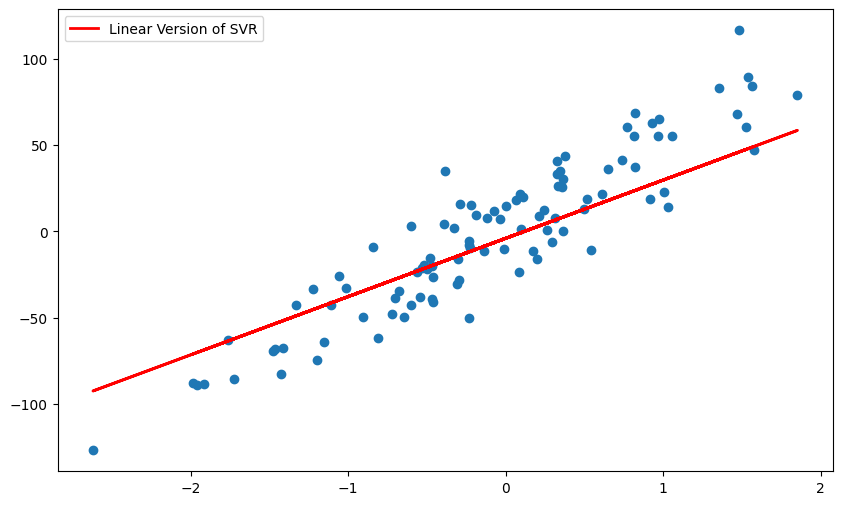

Mean Squared Error: 670.8157
R² = 0.6811786406667667


In [36]:
#Training the linear model
svr_model_linear.fit(X_train, y_train)
y_pred_linear = svr_model_linear.predict(X_test)

# Evaluating the linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

y_pred_total_linear = svr_model_linear.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, y_pred_total_linear, c='red', lw=2, linestyle='-', label='Linear Version of SVR')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"R² = {r2_linear}")


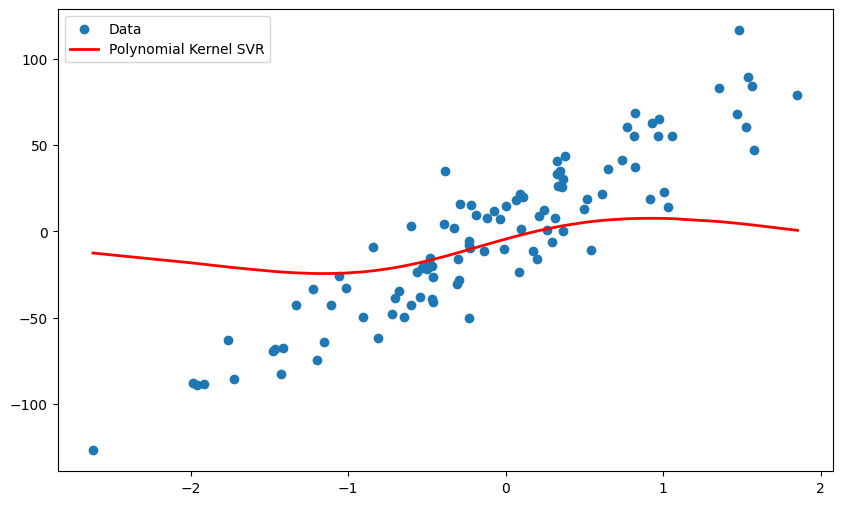

Mean Squared Error: 1547.1330
R² = 0.2647


In [37]:
#Training the polynomial model
svr_model_poly.fit(X_train, y_train)
y_pred_poly = svr_model_poly.predict(X_test)

# Evaluating the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

X_plot = np.sort(X, axis=0)
y_pred_total_poly = svr_model_poly.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_plot, y_pred_total_poly, color='red', lw=2, linestyle='-', label='Polynomial Kernel SVR')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"R² = {r2_poly:.4f}")

The data is visually linear. Therefore a polynomial regression will underfit

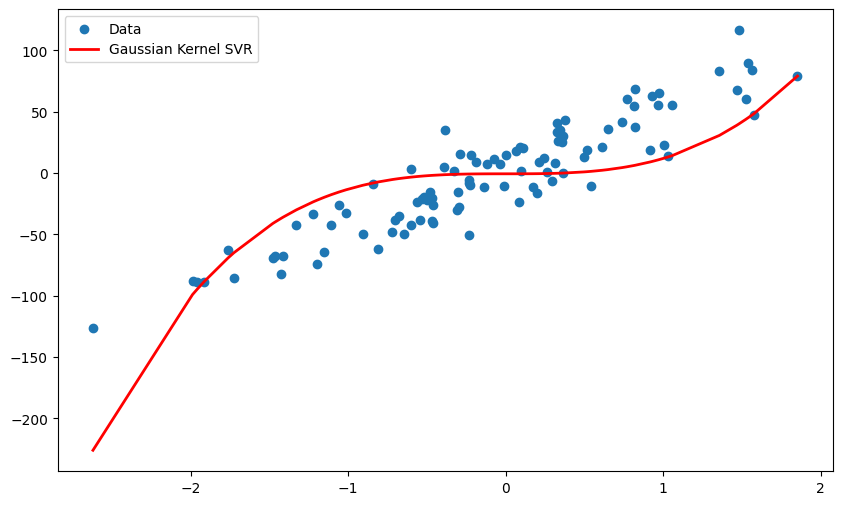

Mean Squared Error: 1177.3503
R² = 0.4404


In [38]:
#Training the gaussian model
svr_model_rbf.fit(X_train, y_train)
y_pred_rbf = svr_model_rbf.predict(X_test)

# Evaluating the gaussian model
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

X_plot = np.sort(X, axis=0)
y_pred_total_rbf = svr_model_rbf.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_plot, y_pred_total_rbf, color='red', lw=2, linestyle='-', label='Gaussian Kernel SVR')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse_rbf:.4f}")
print(f"R² = {r2_rbf:.4f}")

Similar case to rbf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data
df = pd.read_csv("data_regression.csv")
print(df.columns)
df.head()


Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Target'],
      dtype='object')


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,-2.872262,0.323168,0.513600,-1.594703,NaN,-0.532701,0.140886,-0.466037,-1.169917,-1.768439,-373.866504
1,-0.276813,-0.364953,2.056207,-1.966357,-0.839210,-1.103208,0.538296,NaN,-0.221254,1.072507,-375.232263
2,-0.692421,-0.622649,-0.611769,-1.320023,0.194607,-0.037037,NaN,-0.742471,-0.429302,1.695051,-229.111073
3,0.424166,2.075261,-0.651418,0.197911,-0.689188,-0.483886,1.317394,1.735964,-0.320347,0.197600,230.160678
4,0.751387,-0.238948,0.500917,0.755391,-0.907564,-0.977555,0.270457,-0.576771,0.099332,NaN,-36.060685


In [4]:
# 3. Check and handle missing values
print("\n Missing values per column:")
print(df.isnull().sum())

# 3.5 Fill missing values with column mean
df.fillna(df.mean(), inplace=True)
print("\n Missing values filled with column means.")

df.head()


 Missing values per column:
Feature_0    0
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Feature_7    0
Feature_8    0
Feature_9    0
Target       0
dtype: int64

 Missing values filled with column means.


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,-2.872262,0.323168,0.513600,-1.594703,0.013110,-0.532701,0.140886,-0.466037,-1.169917,-1.768439,-373.866504
1,-0.276813,-0.364953,2.056207,-1.966357,-0.839210,-1.103208,0.538296,0.136299,-0.221254,1.072507,-375.232263
2,-0.692421,-0.622649,-0.611769,-1.320023,0.194607,-0.037037,0.042872,-0.742471,-0.429302,1.695051,-229.111073
3,0.424166,2.075261,-0.651418,0.197911,-0.689188,-0.483886,1.317394,1.735964,-0.320347,0.197600,230.160678
4,0.751387,-0.238948,0.500917,0.755391,-0.907564,-0.977555,0.270457,-0.576771,0.099332,0.064297,-36.060685


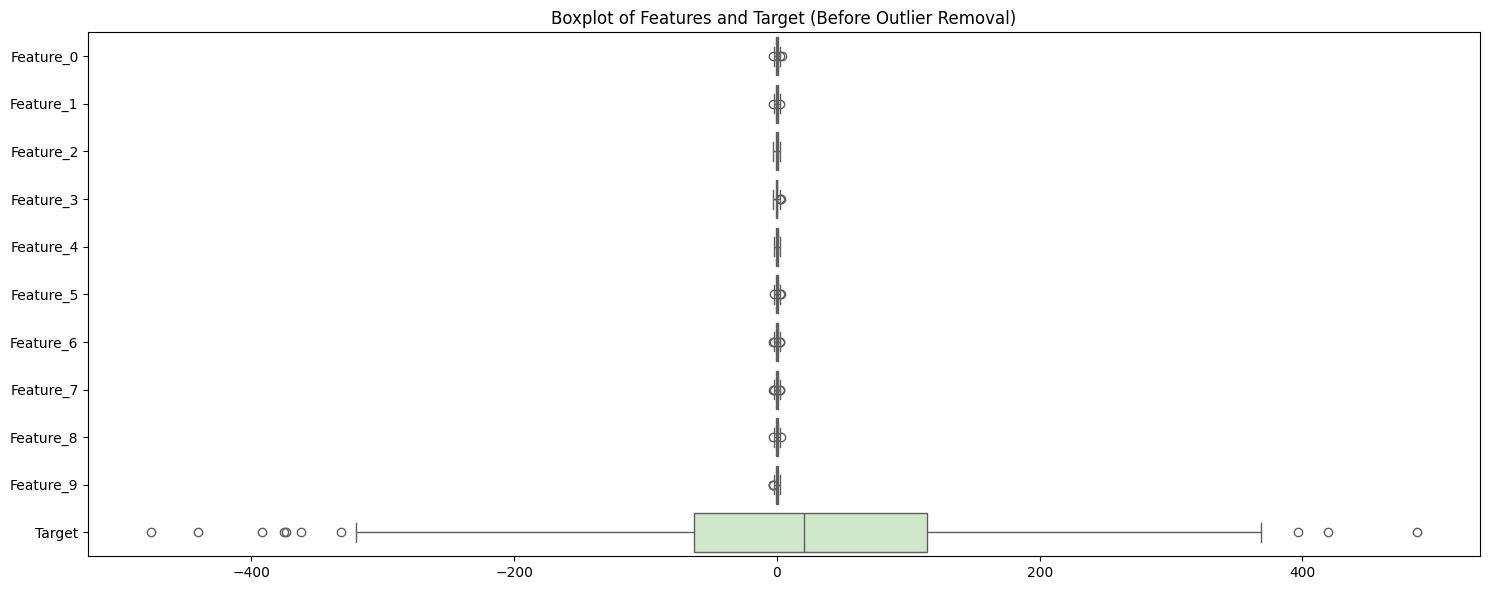

In [6]:
# 4. Outlier detection via boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, orient='h', palette='Set3')
plt.title("Boxplot of Features and Target (Before Outlier Removal)")
plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import zscore

# 4.5 Outlier removal using Z-score
z_scores = np.abs(zscore(df))
threshold = 3

# Keep only rows where all z-scores are below the threshold
df_clean = df[(z_scores < threshold).all(axis=1)]

print(f"\nShape before outlier removal: {df.shape}")
print(f"Shape after Z-score outlier removal: {df_clean.shape}")


Shape before outlier removal: (200, 11)
Shape after Z-score outlier removal: (192, 11)


In [8]:
# 5. Feature scaling
X_clean = df_clean.drop('Target', axis=1)
y_clean = df_clean['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [9]:
# 6. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

In [10]:
# 7. Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2)
}

In [11]:
# 8. Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({'Model': name, 'R²': r2, 'MSE': mse})

In [12]:
# 9. Compare results
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print("\n Model Performance Comparison:")
print(results_df)


 Model Performance Comparison:
               Model        R²           MSE
1              Ridge  0.936847   1261.456678
2              Lasso  0.936800   1262.399920
0  Linear Regression  0.936650   1265.388735
5  Gradient Boosting  0.722584   5541.264504
4      Random Forest  0.606129   7867.397720
3      Decision Tree  0.294787  14086.328584
6                SVR  0.039404  19187.497466


In [ ]:
# 10. Plot predictions vs true values for best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
best_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, best_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"📈 {best_model_name} Predictions vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()